In [ ]:
# pip install selenium

In [61]:
from selenium import webdriver
import time

url = "https://finance.naver.com/sise/sise_market_sum.naver"
browser = webdriver.Chrome("data/chromedriver_win32/chromedriver.exe")    
browser.get(url)
time.sleep(2)

<ipython-input-61-40d738c4ec6d>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("data/chromedriver_win32/chromedriver.exe")


In [62]:
# 초기항목 설정
button = browser.find_element_by_xpath("//*[@id='contentarea_left']/div[2]/form/div/div/div/a[2]/img")
button.click()

<ipython-input-62-f267bf3ee4db>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = browser.find_element_by_xpath("//*[@id='contentarea_left']/div[2]/form/div/div/div/a[2]/img")


In [63]:
# 체크박스 : 시가총액, 영업이익, PER, ROE, ROA, PBR 체크
checkbox = browser.find_element_by_id("option1")
checkbox.click()
checkbox = browser.find_element_by_id("option15")
checkbox.click()
checkbox = browser.find_element_by_id("option21")
checkbox.click()
checkbox = browser.find_element_by_id("option5")
checkbox.click()
checkbox = browser.find_element_by_id("option18")
checkbox.click()
checkbox = browser.find_element_by_id("option24")
checkbox.click()

<ipython-input-63-dd0f73822a87>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  checkbox = browser.find_element_by_id("option1")
<ipython-input-63-dd0f73822a87>:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  checkbox = browser.find_element_by_id("option15")
<ipython-input-63-dd0f73822a87>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  checkbox = browser.find_element_by_id("option21")
<ipython-input-63-dd0f73822a87>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  checkbox = browser.find_element_by_id("option5")
<ipython-input-63-dd0f73822a87>:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  checkbox = browser.find_element_by_id("option18")
<ipython-input-63-dd0f73822a87>:12: DeprecationWarning: find_element_by_* command

In [64]:
# 적용하기 클릭
apply_button = browser.find_element_by_xpath("//*[@id='contentarea_left']/div[2]/form/div/div/div/a[1]/img")
apply_button.click()

<ipython-input-64-b250150e68bd>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  apply_button = browser.find_element_by_xpath("//*[@id='contentarea_left']/div[2]/form/div/div/div/a[1]/img")


In [65]:
# 코스닥 설정
kosdaq_btn = browser.find_element_by_xpath("//*[@id='contentarea']/div[3]/div/div[2]/a")
kosdaq_btn.click()

<ipython-input-65-720841956351>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  kosdaq_btn = browser.find_element_by_xpath("//*[@id='contentarea']/div[3]/div/div[2]/a")


- html.parser 사용 -> datatable 만들기
    - 기존에 import 된 BeautifulSoup은 4.6.0으로 html_table_parser 패키지의 parser_functions 사용 불가
    - 해당 기능을 사용하기 위해 4.4.1로 downgrade함

- 참고 : https://tariat.tistory.com/793

In [9]:
pip install beautifulsoup4==4.4.1

  Using cached beautifulsoup4-4.4.1-py3-none-any.whl (81 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\beautifulsoup4-4.9.3.dist-info\\COPYING.txt'
Consider using the `--user` option or check the permissions.



In [13]:
pip install html_table_parser

  Using cached html_table_parser-0.1.0-py3-none-any.whl
  Using cached beautifulsoup4-4.4.1-py3-none-any.whl (81 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\beautifulsoup4-4.9.3.dist-info\\COPYING.txt'
Consider using the `--user` option or check the permissions.



In [10]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install --upgrade html5lib

In [ ]:
# pip install html5lib

In [66]:
import html5lib
from bs4 import BeautifulSoup

result_html = browser.page_source
result_soup = BeautifulSoup(result_html, "html.parser")
tags = result_soup.find_all("table", attrs={"class":"type_2"})[0]

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36" lang="ko"><head>
<title>시가총액 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="http://finance.naver.com/sise/sise_market_sum.naver" property="og:url"/>
<meta content="시가총액 : 네이버 금융" property="og:title"/>
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220211144316/css/f
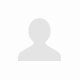
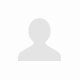

In [31]:
# result_soup 변수에 저장된 html 정보 확인
result_soup

In [42]:
# tags 확인
tags.text.split()

['코스닥',
 'N',
 '종목명',
 '현재가',
 '전일비',
 '등락률',
 '액면가',
 '거래량',
 '상장주식수',
 '시가총액',
 '외국인비율',
 'PER',
 'ROE',
 '토론실',
 '1',
 '셀트리온헬스케어',
 '62,900',
 '0',
 '0.00%',
 '1,000',
 '0',
 '155,061',
 '97,533',
 '17.36',
 '59.34',
 '13.36',
 '2',
 '에코프로비엠',
 '393,500',
 '0',
 '0.00%',
 '500',
 '0',
 '22,919',
 '90,188',
 '14.35',
 '105.84',
 'N/A',
 '3',
 '엘앤에프',
 '202,500',
 '0',
 '0.00%',
 '500',
 '0',
 '34,810',
 '70,491',
 '20.54',
 '-179.68',
 '-9.39',
 '4',
 '펄어비스',
 '100,600',
 '0',
 '0.00%',
 '100',
 '0',
 '66,222',
 '66,619',
 '14.42',
 '128.97',
 '16.45',
 '5',
 '카카오게임즈',
 '75,500',
 '0',
 '0.00%',
 '100',
 '0',
 '77,697',
 '58,661',
 '10.93',
 '57.99',
 '12.12',
 '6',
 '위메이드',
 '109,200',
 '0',
 '0.00%',
 '500',
 '0',
 '33,573',
 '36,662',
 '6.85',
 '68.12',
 '-3.00',
 '7',
 'HLB',
 '30,600',
 '0',
 '0.00%',
 '500',
 '0',
 '106,610',
 '32,623',
 '14.06',
 '-51.43',
 '-24.10',
 '8',
 '셀트리온제약',
 '87,700',
 '0',
 '0.00%',
 '500',
 '0',
 '36,553',
 '32,057',
 '8.14',
 '81.89',
 '7.21',
 '9

In [67]:
# html_parser 패키지 이용해서 변환
from html_table_parser import parser_functions as parser
html_table = parser.make2d(tags)

In [68]:
# 컬럼 기준 데이터 변환, 컬럼 제목 지정하고 데이터 프레임으로 변환
import pandas as pd
df = pd.DataFrame(html_table[1:], columns=html_table[0])
df.head()

,N,종목명,현재가,전일비,등락률,액면가,시가총액,영업이익,PER,ROE,ROA,PBR,토론실
0,,,,,,,,,,,None,None,None
1,1,셀트리온헬스케어,"63,800",900,+1.43%,"1,000","98,929","3,621",60.19,13.36,7.30,4.92,
2,2,에코프로비엠,"392,600",900,-0.23%,500,"89,982",548,105.59,N/A,N/A,16.72,
3,3,엘앤에프,"202,600",100,+0.05%,500,"70,526",15,-179.77,-9.39,-3.40,8.98,
4,4,펄어비스,"101,500",900,+0.89%,100,"67,215","1,573",130.13,16.45,11.43,8.67,


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   N       81 non-null     object
 1   종목명     81 non-null     object
 2   현재가     81 non-null     object
 3   전일비     81 non-null     object
 4   등락률     81 non-null     object
 5   액면가     81 non-null     object
 6   시가총액    81 non-null     object
 7   영업이익    81 non-null     object
 8   PER     81 non-null     object
 9   ROE     81 non-null     object
 10  ROA     80 non-null     object
 11  PBR     80 non-null     object
 12  토론실     80 non-null     object
dtypes: object(13)
memory usage: 8.4+ KB


In [70]:
df.dropna(inplace=True)
df.head()

,N,종목명,현재가,전일비,등락률,액면가,시가총액,영업이익,PER,ROE,ROA,PBR,토론실
1,1,셀트리온헬스케어,"63,800",900,+1.43%,"1,000","98,929","3,621",60.19,13.36,7.30,4.92,
2,2,에코프로비엠,"392,600",900,-0.23%,500,"89,982",548,105.59,N/A,N/A,16.72,
3,3,엘앤에프,"202,600",100,+0.05%,500,"70,526",15,-179.77,-9.39,-3.40,8.98,
4,4,펄어비스,"101,500",900,+0.89%,100,"67,215","1,573",130.13,16.45,11.43,8.67,
5,5,카카오게임즈,"75,400",100,-0.13%,100,"58,583",665,57.91,12.12,7.10,3.96,


In [71]:
df2 = df.copy()

In [72]:
df2 = df.drop(["토론실"], axis=1)
df2.head() 

,N,종목명,현재가,전일비,등락률,액면가,시가총액,영업이익,PER,ROE,ROA,PBR
1,1,셀트리온헬스케어,"63,800",900,+1.43%,"1,000","98,929","3,621",60.19,13.36,7.30,4.92
2,2,에코프로비엠,"392,600",900,-0.23%,500,"89,982",548,105.59,N/A,N/A,16.72
3,3,엘앤에프,"202,600",100,+0.05%,500,"70,526",15,-179.77,-9.39,-3.40,8.98
4,4,펄어비스,"101,500",900,+0.89%,100,"67,215","1,573",130.13,16.45,11.43,8.67
5,5,카카오게임즈,"75,400",100,-0.13%,100,"58,583",665,57.91,12.12,7.10,3.96


In [73]:
df2.dropna(axis=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1 to 80
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   N       80 non-null     object
 1   종목명     80 non-null     object
 2   현재가     80 non-null     object
 3   전일비     80 non-null     object
 4   등락률     80 non-null     object
 5   액면가     80 non-null     object
 6   시가총액    80 non-null     object
 7   영업이익    80 non-null     object
 8   PER     80 non-null     object
 9   ROE     80 non-null     object
 10  ROA     80 non-null     object
 11  PBR     80 non-null     object
dtypes: object(12)
memory usage: 8.1+ KB


- 참고 : https://codesample-factory.tistory.com/1081
    - pandas는 값이 np.nan 객체인 경우 null로 인식하며 dataframe에서 `NaN`으로 인쇄
    - 누락된 값은 pandas가 null로 인식하지 못하는 빈 문자열일 수도 있다.
    - 해결방법 : replace()를 사용하여 빈 셀에 있는 모든 것을 np.nan 객체로 변환한 다음, dropna()를 호출

In [74]:
import numpy as np
df2[:].replace("", np.nan, inplace=True)
df2

,N,종목명,현재가,전일비,등락률,액면가,시가총액,영업이익,PER,ROE,ROA,PBR
1,1,셀트리온헬스케어,"63,800",900,+1.43%,"1,000","98,929","3,621",60.19,13.36,7.30,4.92
2,2,에코프로비엠,"392,600",900,-0.23%,500,"89,982",548,105.59,N/A,N/A,16.72
3,3,엘앤에프,"202,600",100,+0.05%,500,"70,526",15,-179.77,-9.39,-3.40,8.98
4,4,펄어비스,"101,500",900,+0.89%,100,"67,215","1,573",130.13,16.45,11.43,8.67
5,5,카카오게임즈,"75,400",100,-0.13%,100,"58,583",665,57.91,12.12,7.10,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...
76,49,레고켐바이오,"45,350","1,050",+2.37%,500,"10,991",-298,-27.45,-6.19,-5.04,5.18
77,50,SFA반도체,"6,650",120,+1.84%,500,"10,937",343,26.60,5.22,2.82,2.83
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df2.dropna(inplace=True)
df2.head()

,N,종목명,현재가,전일비,등락률,액면가,시가총액,영업이익,PER,ROE,ROA,PBR
1,1,셀트리온헬스케어,"63,800",900,+1.43%,"1,000","98,929","3,621",60.19,13.36,7.30,4.92
2,2,에코프로비엠,"392,600",900,-0.23%,500,"89,982",548,105.59,N/A,N/A,16.72
3,3,엘앤에프,"202,600",100,+0.05%,500,"70,526",15,-179.77,-9.39,-3.40,8.98
4,4,펄어비스,"101,500",900,+0.89%,100,"67,215","1,573",130.13,16.45,11.43,8.67
5,5,카카오게임즈,"75,400",100,-0.13%,100,"58,583",665,57.91,12.12,7.10,3.96


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 77
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   N       50 non-null     object
 1   종목명     50 non-null     object
 2   현재가     50 non-null     object
 3   전일비     50 non-null     object
 4   등락률     50 non-null     object
 5   액면가     50 non-null     object
 6   시가총액    50 non-null     object
 7   영업이익    50 non-null     object
 8   PER     50 non-null     object
 9   ROE     50 non-null     object
 10  ROA     50 non-null     object
 11  PBR     50 non-null     object
dtypes: object(12)
memory usage: 5.1+ KB


In [77]:
df2.to_csv("selenium_text.xlsx")

- 전체 페이지에 있는 표 크롤링

In [26]:
# 현재 페이지
curPage = 1

# 크롤링할 전체 페이지 수
totalPage = 31

# url
url = "https://finance.naver.com/sise/sise_market_sum.naver?&page={}".format(page)"

# table tag 확인
result_html = browser.page_source
result_soup = BeautifulSoup(result_html, "html.parser")
tags = result_soup.find_all("table", attrs={"class":"type_2"})[0]

# 컬럼 기준 데이터 변환, 컬럼 제목 지정하고 데이터 프레임으로 변환
pd.DataFrame(html_table[1:], columns=html_table[0])

In [25]:
# # 1 페이지에서 31 페이지가 될 때까지 계속 실행되는 코드 생성
# while curPage <= totalPage:
#     # 페이지에 있는 내용 저장
#     result_html = browser.page_source
#     # 각 페이지에 해당하는 내용을 가져오기 위해 BeautifulSoup 생성
#     soup = BeautifulSoup(browser.page_source, "html.parser")
#     # 

In [82]:
from selenium import webdriver
from bs4 import BeautifulSoup
from html_table_parser import parser_functions as parser
import time
import pandas as pd
import numpy as np

def get_tables(page):
    url = "https://finance.naver.com/sise/sise_market_sum.naver"
    browser = webdriver.Chrome("data/chromedriver_win32/chromedriver.exe")    
    browser.get(url)
    time.sleep(2)

    # 초기항목 설정
    button = browser.find_element_by_xpath("//*[@id='contentarea_left']/div[2]/form/div/div/div/a[2]/img")
    button.click()

    # 체크박스 : 시가총액, 영업이익, PER, ROE, ROA, PBR 체크
    checkbox = browser.find_element_by_id("option1")
    checkbox.click()
    checkbox = browser.find_element_by_id("option15")
    checkbox.click()
    checkbox = browser.find_element_by_id("option21")
    checkbox.click()
    checkbox = browser.find_element_by_id("option5")
    checkbox.click()
    checkbox = browser.find_element_by_id("option18")
    checkbox.click()
    checkbox = browser.find_element_by_id("option24")
    checkbox.click()


    # 적용하기 클릭
    apply_button = browser.find_element_by_xpath("//*[@id='contentarea_left']/div[2]/form/div/div/div/a[1]/img")
    apply_button.click()

    # 코스닥 설정
    kosdaq_btn = browser.find_element_by_xpath("//*[@id='contentarea']/div[3]/div/div[2]/a")
    kosdaq_btn.click()

    print(f"    페이지 : {page}")

In [83]:
for page in range(curPage, totalPage+1):
    # # 현재 페이지
    # curPage = 1
    # # 크롤링할 전체 페이지 수
    # totalPage = 31
    
    url = "https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={}".format(page)
    browser.get(url)

    # html 페이지 소스 확인 
    result_html = browser.page_source
    # BeautifulSoup으로 페이지 소스 파싱
    result_soup = BeautifulSoup(result_soup, "html.parser")
    # html에서 table tag 확인
    tags = result_soup.find_all("table", attrs={"class":"type_2"})[0]
    # html_parser 패키지 이용해서 변환
    html_table = parser.make2d(tags)
    # 컬럼 기준 데이터 변환, 컬럼 제목 지정하고 데이터 프레임으로 변환
    df[page] = pd.DataFrame(html_table[1:], columns=html_table[0])
    # 데이터 프레임 concat, 행을 기준으로 이어붙이기
    result = pd.concat([df[page], df[page+1]], axis=0, ignore_index=True)
    # time.sleep 설정
    time.sleep(2)
print(result)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=98.0.4758.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x002869A3+2582947]
	Ordinal0 [0x0021A6D1+2139857]
	Ordinal0 [0x00113960+1063264]
	Ordinal0 [0x00108092+1015954]
	Ordinal0 [0x001088C8+1018056]
	Ordinal0 [0x0010A102+1024258]
	Ordinal0 [0x00103DE9+998889]
	Ordinal0 [0x00114DD0+1068496]
	Ordinal0 [0x00167B12+1407762]
	Ordinal0 [0x00158366+1344358]
	Ordinal0 [0x00135176+1200502]
	Ordinal0 [0x00136066+1204326]
	GetHandleVerifier [0x0042BE02+1675858]
	GetHandleVerifier [0x004E036C+2414524]
	GetHandleVerifier [0x0031BB01+560977]
	GetHandleVerifier [0x0031A8D3+556323]
	Ordinal0 [0x0022020E+2163214]
	Ordinal0 [0x00225078+2183288]
	Ordinal0 [0x002251C0+2183616]
	Ordinal0 [0x0022EE1C+2223644]
	BaseThreadInitThunk [0x769FFA29+25]
	RtlGetAppContainerNamedObjectPath [0x770E7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x770E7A6E+238]
	(No symbol) [0x00000000]
